In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
from sklearn.decomposition import PCA

In [222]:
pca = PCA(n_components=2)

In [229]:
iris = load_iris()
X, y = pca.fit_transform(iris.data), iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [230]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [231]:
def plotBoundary(model, X, y, title):
    fig, ax = plt.subplots()
    xx, yy = np.meshgrid(np.arange(X[:,0].min()-1, X[:,0].max()+1, 2e-2), 
                         np.arange(X[:,1].min()-1, X[:,1].max()+1, 2e-2))
    plot_contours(ax,model,xx,yy,cmap=plt.cm.gist_earth)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.flag, s=40, edgecolors='c')
    plt.title(title)
    plt.grid()
    plt.show()

## Linear

In [232]:
def onlineSVM(i, clf, X_train, y_train, X_test, y_test):
    sv = clf.support_vectors_ 
    X_train = np.concatenate((X_train, X_test[i].reshape(1,-1)), axis=0)
    y_train = np.concatenate((y_train, np.array([y_test[i]])), axis=0)
    for _ in sv.tolist():
        temp = np.where(X_train == np.array(_))
        y_.append(y_train[temp[0][0]])
    y_.append(y_test[i])
    clf.fit(np.concatenate((sv, X_test[i].reshape(1,-1)), axis=0), np.array(y_))
    return clf, X_train, y_train

In [233]:
clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

best = 0.
while True:
    y_pred = clf.predict(X_test)
    if accuracy_score(y_test, y_pred) > best:
        best = accuracy_score(y_test, y_pred)
        print (best)
    else:
        break
    for i in range(len(y_test)):
        y_ = []
        y_pr = clf.predict(X_test[i].reshape(1,-1))
        if y_pr[0] != y_test[i]:
            clf, X_train, y_train = onlineSVM(i, clf, X_train, y_train, X_test, y_test)

0.9777777777777777


In [234]:
print (best)

0.9777777777777777


In [196]:
# a = np.array([[-1,0],[0,1],[0,-1],[1,0],[3,-1],[3,1],[6,-1],[6,1]])
a = np.array([[1,4],[2,3],[4,5],[5,6]])

In [197]:
# b = np.array([1,1,1,1,2,2,2,2])
b = np.array([1,1,2,2])

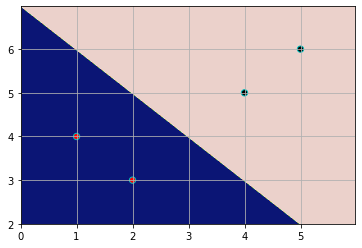

In [198]:
clf = SVC(kernel='linear')

clf.fit(a,b)

plotBoundary(clf, a, b, "")